In [15]:
# %load_ext autoreload
# %autoreload 2

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from persim import plot_diagrams

import warnings
warnings.filterwarnings('ignore')

In [17]:
from astropology.constants import PASSBANDS, CLASSES
from astropology.distance import bottleneck_distance
from astropology.distance import wasserstein_distance
from astropology.signal import pd_signal

In [18]:
data_directory = "/home/edgar/astropology/data/"

lcs = pd.read_csv(
    f"{data_directory}/plasticc_train_lightcurves.csv.gz",
)
meta_data = pd.read_csv(
    f"{data_directory}/plasticc_train_metadata.csv.gz",
    index_col="object_id"
)

In [19]:
g_mask = lcs["passband"] == PASSBANDS["g"]
g_df = lcs.loc[g_mask].copy()
g_df.head()
object_ids = g_df["object_id"].unique()

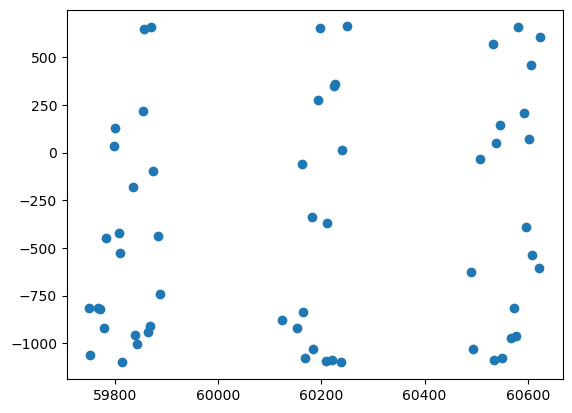

In [20]:
flux = g_df.loc[g_df["object_id"]==object_ids[0], "flux"].to_numpy()
mjd = g_df.loc[g_df["object_id"]==object_ids[0], "mjd"].to_numpy()
plt.scatter(mjd, flux)


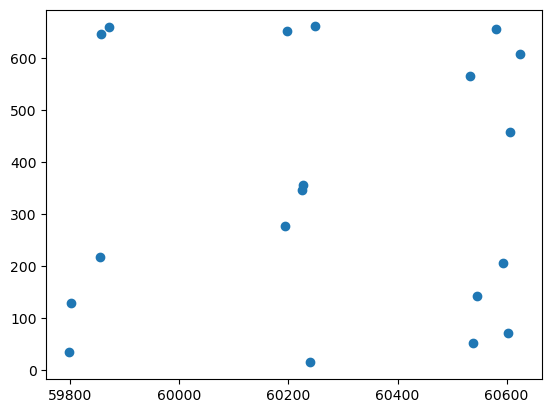

In [21]:
# mask negative values
flux_p = flux[flux >= 0]
mjd_p = mjd[flux >= 0]
plt.scatter(mjd_p, flux_p)

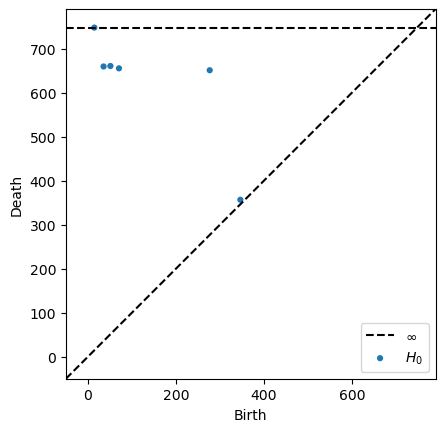

In [22]:
pd_control = pd_signal(signal=flux_p)
plot_diagrams(pd_control)

## Distance Vs Amplitude

In [23]:
amplitudes = np.logspace(0, 2, 100)

# remove point at infinity before computing distances
pdgm_i = pd_control[np.isfinite(pd_control[:, 1]), :]

wds = np.empty(amplitudes.size)
bds = np.empty(amplitudes.size)

for idx, amplitude in enumerate(amplitudes):
    
    pdgm_j = pd_signal(amplitude*flux_p)
    pdgm_j = pdgm_j[np.isfinite(pdgm_j[:, 1]), :]

    wds[idx] = wasserstein_distance(pdgm_i, pdgm_j)
    bds[idx] = bottleneck_distance(pdgm_i, pdgm_j)

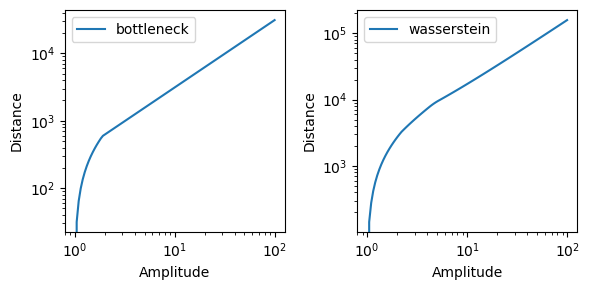

In [24]:
fig, axs = plt.subplots(
    nrows=1, ncols=2, tight_layout=True, figsize=(6, 3)
)
# plt.plot(amplitudes, wds)
axs[0].plot(amplitudes, bds, label="bottleneck")
axs[1].plot(amplitudes, wds, label="wasserstein")

for ax in axs: ax.set_xlabel("Amplitude")
for ax in axs: ax.set_ylabel("Distance")
for ax in axs: ax.legend()
for ax in axs: ax.set_xscale("log"), ax.set_yscale("log")
# plt.xscale("log")
# plt.hlines(
#     y=0,
#     xmin=amplitudes.min(), xmax=amplitudes.max(),
#     colors="red"
#     )
# plt.yscale("log")

Dynamical range with two different time series

In [25]:
signal_1 = g_df.loc[
    g_df["object_id"]==object_ids[0], "flux"
].to_numpy()
mask_1 = signal_1 >=0
signal_1 = signal_1[mask_1]
mjd_1 = g_df.loc[
    g_df["object_id"]==object_ids[0], "mjd"
].to_numpy()
mjd_1 = mjd_1[mask_1]

signal_2 = g_df.loc[
    g_df["object_id"]==object_ids[1], "flux"
].to_numpy()
mask_2 = signal_2 >=0
signal_2 = signal_2[mask_2]
mjd_2 = g_df.loc[
    g_df["object_id"]==object_ids[1], "mjd"
].to_numpy()
mjd_2 = mjd_2[mask_2]

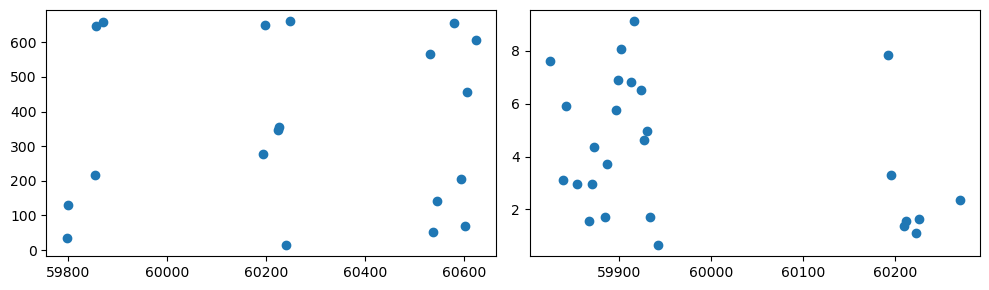

In [26]:
fig, axs = plt.subplots(ncols=2, tight_layout=True, figsize=(10, 3))
axs[0].scatter(mjd_1, signal_1)
axs[1].scatter(mjd_2, signal_2)

In [27]:
amplitudes_1 = np.logspace(0, 3, 100)
amplitudes_2 = np.logspace(0, 3, 100)

# remove point at infinity before computing distances
pdgm_1 = pd_signal(signal_1)
pdgm_1 = pdgm_1[np.isfinite(pdgm_1[:, 1]), :]

wds_1 = np.empty(amplitudes_1.size)
bds_1 = np.empty(amplitudes_1.size)

for idx, amplitude in enumerate(amplitudes_2):
    
    pdgm_j = pd_signal(amplitude*signal_2)
    pdgm_j = pdgm_j[np.isfinite(pdgm_j[:, 1]), :]

    wds_1[idx] = wasserstein_distance(pdgm_1, pdgm_j)
    bds_1[idx] = bottleneck_distance(pdgm_1, pdgm_j)

pdgm_2 = pd_signal(signal_2)
pdgm_2 = pdgm_2[np.isfinite(pdgm_2[:, 1]), :]
wds_2 = np.empty(amplitudes_2.size)
bds_2 = np.empty(amplitudes_2.size)

for idx, amplitude in enumerate(amplitudes_1):
    
    pdgm_j = pd_signal(amplitude*signal_1)
    pdgm_j = pdgm_j[np.isfinite(pdgm_j[:, 1]), :]

    wds_2[idx] = wasserstein_distance(pdgm_2, pdgm_j)
    bds_2[idx] = bottleneck_distance(pdgm_2, pdgm_j)

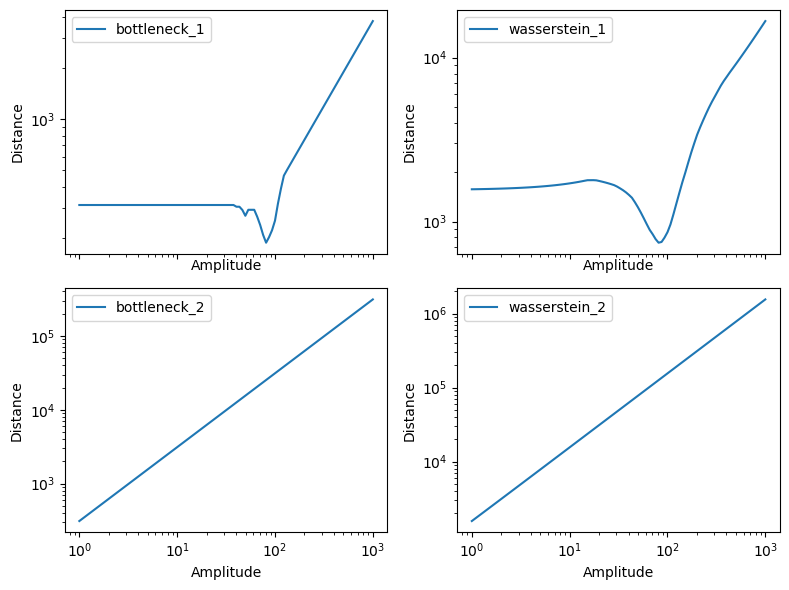

In [28]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, tight_layout=True, figsize=(8, 6),
    sharex=True
)
# plt.plot(amplitudes, wds)
axs[0, 0].plot(amplitudes_2, bds_1, label="bottleneck_1")
axs[0, 1].plot(amplitudes_2, wds_1, label="wasserstein_1")
axs[1, 0].plot(amplitudes_1, bds_2, label="bottleneck_2")
axs[1, 1].plot(amplitudes_1, wds_2, label="wasserstein_2")

for ax in np.ravel(axs): ax.set_xlabel("Amplitude")
for ax in np.ravel(axs): ax.set_ylabel("Distance")
for ax in np.ravel(axs): ax.legend()
for ax in np.ravel(axs): ax.set_xscale("log"), ax.set_yscale("log")
